# Feature Engineering

## Categorical variables

Removing ordinal values of categorical variables and relabelling. And converting into dummy variables

In [3]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.despine()
sns.set_context('talk', font_scale = 1)
import statsmodels.formula.api as smf
import os

In [7]:
def InitiateData():
    '''
    Imports the data set and prepare it for EDA and modelling
    '''
    global data
    
    data = pd.read_excel('default of credit card clients.xls', header=1, index_col=0)

    col_names = ['Balance', 'Sex', 'Education', 'Marriage', 'Age',
                'Paid_Sep', 'Paid_Aug', 'Paid_Jul', 'Paid_Jun', 'Paid_May', 'Paid_Apr',
                'Bill_Sep', 'Bill_Aug', 'Bill_Jul', 'Bill_Jun', 'Bill_May', 'Bill_Apr',
                'PayAmt_Sep', 'PayAmt_Aug', 'PayAmt_Jul', 'PayAmt_Jun', 'PayAmt_May', 'PayAmt_Apr',
                'Default']
    data.columns = col_names
    data = data.astype(str).astype(int)
    
    return data.head()


pd.set_option('display.max_columns', 500)
InitiateData()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
data['Sex'] = data['Sex'].map({1: 'Male', 2: 'Female'})
data['Education'] = data['Education'].map({1: 'Graduate', 2: 'University', 3: 'High school', 4: 'Other_Education', 0: 'NA_0', 
                                          5: 'NA_5', 6: 'NA_6'})
data['Marriage'] = data['Marriage'].map({1: 'Married', 2: 'Single', 3: 'Other_Marriage', 0: 'NA_Marriage'})
data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default
ID,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
encode = 'Sex', 'Education', 'Marriage'
for i in encode: 
    i = pd.get_dummies(data[i], columns=i, drop_first=True)
    data = pd.concat([data, i], axis=1)

data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default,Male,High school,NA_0,NA_5,NA_6,Other_Education,University,NA_Marriage,Other_Marriage,Single
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,1,0,0,1
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,1,0,0,1
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,1,0,0,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,0,1,0,0,0


In [10]:
data = data.assign(Education_NA = data['NA_0'] + data['NA_5'] + data['NA_6'])
# Maybe drop NA_0, NA_5, NA_6 at this point too?

data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default,Male,High school,NA_0,NA_5,NA_6,Other_Education,University,NA_Marriage,Other_Marriage,Single,Education_NA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,1,0,0,1,0
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,1,0,0,1,0
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,1,0,0,0,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,0,1,0,0,0,0


Creating bin variables for Age: Young, Mature, Elderly

If observation within this range, outputs 1. If not, 0.

Consideration: this allocation might not be 'fair' since the number of observations within Young and Elderly may not be as large as Mature. Could consider dividing the 58 years between 21 and 79 equally. It would just the defeat the generational interpretation effect

In [12]:
data['Young'] = np.where((data['Age'] >= 21) & (data['Age'] <= 35), 1, 0)
data['Mature'] = np.where((data['Age'] >= 36) & (data['Age'] <= 64), 1, 0)
data['Elderly'] = np.where((data['Age'] >= 65), 1, 0)

data.head(10)

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default,Male,High school,NA_0,NA_5,NA_6,Other_Education,University,NA_Marriage,Other_Marriage,Single,Education_NA,Young,Mature,Elderly
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
6,50000,Male,Graduate,Single,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
7,500000,Male,Graduate,Single,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0
8,100000,Female,University,Single,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
9,140000,Female,High school,Married,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [24]:
#If bill increases by x% in the last three months

x = 1.5
data['3mnthBillIncrease'] = np.where((data['Bill_Sep'] >= data['Bill_Jul']*x), 1, 0)

#If bill has been constantly increasing over 6 months
data['constant_increase'] = np.where((data['Bill_Sep'] >= data['Bill_Aug']) & (data['Bill_Aug'] >= data['Bill_Jul']) & (data['Bill_Jul'] >= data['Bill_Jun']) & (data['Bill_Jun'] >= data['Bill_May']) & (data['Bill_May'] >= data['Bill_Apr']), 1, 0)

#Different Age Buckets
data['20-25'] = np.where((data['Age'] >= 21) & (data['Age'] <= 24), 1, 0)
data['25-30'] = np.where((data['Age'] >= 25) & (data['Age'] <= 29), 1, 0)
data['30s'] = np.where((data['Age'] >= 30) & (data['Age'] <= 39), 1, 0)
data['40s'] = np.where((data['Age'] >= 40) & (data['Age'] <= 49), 1, 0)
data['Stable'] = np.where((data['Age'] >= 50) & (data['Age'] <= 64), 1, 0)
data['Old'] = np.where((data['Age'] >= 65), 1, 0)

#If payment as proportion of bill has dropped in last three months
data['Pay%Drop'] = np.where((data['PayAmt_Jul']/data['Bill_Jul'] >= data['PayAmt_Sep']/data['Bill_Sep']), 1, 0)

data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,Paid_Apr,Bill_Sep,Bill_Aug,Bill_Jul,Bill_Jun,Bill_May,Bill_Apr,PayAmt_Sep,PayAmt_Aug,PayAmt_Jul,PayAmt_Jun,PayAmt_May,PayAmt_Apr,Default,Male,High school,NA_0,NA_5,NA_6,Other_Education,University,NA_Marriage,Other_Marriage,Single,Education_NA,Young,Mature,Elderly,3mnthBillIncrease,20-25,25-30,30s,40s,Stable,Old,constant_increase,Pay%Jul,Pay%Sep,Pay%Drop
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0.000000,0.000000,1
2,120000,Female,University,Single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.372856,0.000000,1
3,90000,Female,University,Single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0.073752,0.051917,1
4,50000,Female,University,Married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.024345,0.042562,0
5,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.279057,0.232099,1


## Polynomials and interactions

In [27]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly.fit_transform(data[continuous+discrete])

array([[ 1.000000e+00,  2.000000e+04,  3.913000e+03, ...,  0.000000e+00,
         0.000000e+00,  5.760000e+02],
       [ 1.000000e+00,  1.200000e+05,  2.682000e+03, ...,  4.000000e+06,
         5.200000e+04,  6.760000e+02],
       [ 1.000000e+00,  9.000000e+04,  2.923900e+04, ...,  2.500000e+07,
         1.700000e+05,  1.156000e+03],
       ...,
       [ 1.000000e+00,  3.000000e+04,  3.565000e+03, ...,  9.610000e+06,
         1.147000e+05,  1.369000e+03],
       [ 1.000000e+00,  8.000000e+04, -1.645000e+03, ...,  3.254416e+06,
         7.396400e+04,  1.681000e+03],
       [ 1.000000e+00,  5.000000e+04,  4.792900e+04, ...,  1.000000e+06,
         4.600000e+04,  2.116000e+03]])

## Transformations

Logarithmic transformation does not work because it can not deal with zero values - undefined.

Box Cox transformation does not work because it can not deal with negative values. 

Exponential transformation does work but produces 'inf' values - which I believe cannot be easily visualised.

Note: could consider a logarithmic + constant transformation because it would theoretically work. But not sure how to implement this - would require finding the min(x) value for each variable I believe.

In [28]:
#for i in continuous:
#    data[i+'_exp'] = np.exp(data[i])
#    
#data.head()

,Balance,Sex,Education,Marriage,Age,Paid_Sep,Paid_Aug,Paid_Jul,Paid_Jun,Paid_May,...,Bill_Jul_exp,Bill_Jun_exp,Bill_May_exp,Bill_Apr_exp,PayAmt_Sep_exp,PayAmt_Aug_exp,PayAmt_Jul_exp,PayAmt_Jun_exp,PayAmt_May_exp,PayAmt_Apr_exp
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,Female,University,Married,24,2,2,-1,-1,-2,...,1.693940e+299,1.000000,1.000000,1.000000,1.000000,1.693940e+299,1.000000,1.000000,1.000000e+00,1.000000e+00
2,120000,Female,University,Single,26,-1,2,0,0,0,...,inf,inf,inf,inf,1.000000,inf,inf,inf,1.000000e+00,inf
3,90000,Female,University,Single,34,0,0,0,0,0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,50000,Female,University,Married,37,0,0,0,0,0,...,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
5,50000,Male,University,Married,57,-1,0,-1,0,0,...,inf,inf,inf,inf,inf,inf,inf,inf,1.693940e+299,7.690476e+294


KeyError: 'Bill_Jul_exp'

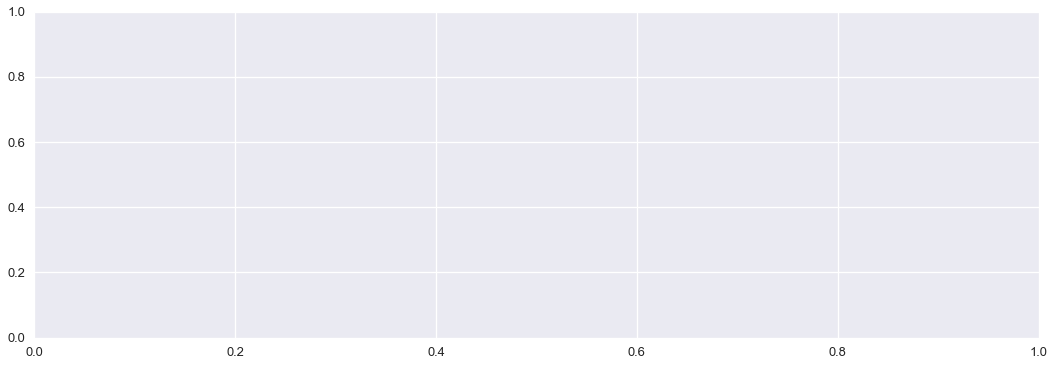

In [33]:
#import statsmodels.api as sm
#
## Comparison of the original and transformed on Q-Q plot
#
#label = ['Bill_Jul_exp']
#
#fig, ax = plt.subplots(1,1, figsize = (18,6))
#i = 0
#for series in label:
#    pp = sm.ProbPlot(data[series], fit=True)
#    qq = pp.qqplot(color = sns.color_palette()[0], alpha=0.9, ax=ax[i])
#    a = ax[i].get_xlim()[0]
#    b = ax[i].get_xlim()[1]
#    ax[i].plot([a,b],[a,b], color='black', alpha=0.75)
#    ax[i].set_xlim(a,b)
#    ax[i].set_title('Normal Q-Q plot for {}'.format(series))
#    i+=1
#
#plt.tight_layout()
#plt.show()

## New Variables